In [1]:
import pandas as pd
import datetime
import scipy.stats as st
import matplotlib.pyplot as plt
from matplotlib import cm
import numpy as np
from scipy.stats import linregress

In [2]:
gas_price_data = "Resource/Gas Price from 2000.csv"
gas_price_df = pd.read_csv(gas_price_data, header = 10)
new_index_df = gas_price_df.set_index('observation_date')
renamed_df = gas_price_df.rename(columns={"GASREGW":"GasPrice", "observation_date": "Date"})
renamed_df

,Date,GasPrice
0,2000-01-03,1.272
1,2000-01-10,1.264
2,2000-01-17,1.277
3,2000-01-24,1.315
4,2000-01-31,1.316
...,...,...
1106,2021-03-15,2.853
1107,2021-03-22,2.865
1108,2021-03-29,2.852
1109,2021-04-05,2.857


<AxesSubplot:xlabel='observation_date'>

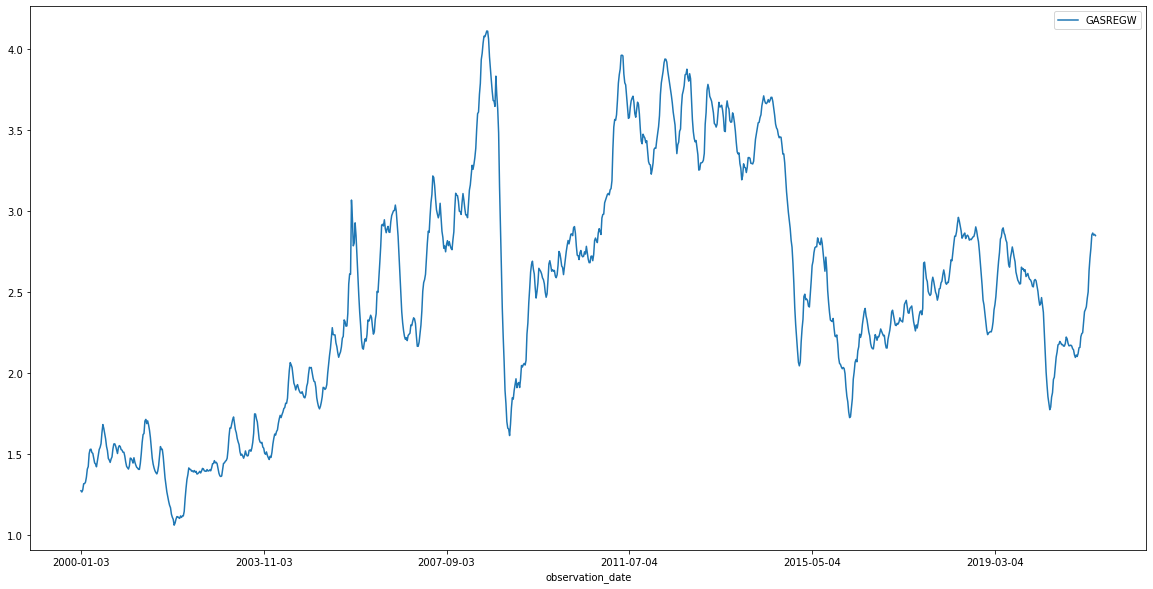

In [3]:
# Generaltrends of gas price from 2000 to 2021 
new_index_df.plot.line(figsize=(20, 10))

In [4]:
# Descriptive Statistics throughout the time 
renamed_df.describe()

,GasPrice
count,1111.000000
mean,2.486003
std,0.733902
min,1.059000
25%,1.919000
50%,2.471000
75%,2.944000
max,4.114000


In [5]:
# See the top 10 highest price 
renamed_df.nlargest(10, ["GasPrice"])

,Date,GasPrice
444,2008-07-07,4.114
445,2008-07-14,4.113
443,2008-06-30,4.095
441,2008-06-16,4.082
442,2008-06-23,4.079
446,2008-07-21,4.064
440,2008-06-09,4.039
439,2008-06-02,3.976
592,2011-05-09,3.965
591,2011-05-02,3.963


In [6]:
# Break down them into Year, Month, Day 
renamed_df['Year'] = pd.DatetimeIndex(renamed_df['Date']).year
renamed_df['Month'] = pd.DatetimeIndex(renamed_df['Date']).month
renamed_df['Day'] = pd.DatetimeIndex(renamed_df['Date']).day
renamed_df

,Date,GasPrice,Year,Month,Day
0,2000-01-03,1.272,2000,1,3
1,2000-01-10,1.264,2000,1,10
2,2000-01-17,1.277,2000,1,17
3,2000-01-24,1.315,2000,1,24
4,2000-01-31,1.316,2000,1,31
...,...,...,...,...,...
1106,2021-03-15,2.853,2021,3,15
1107,2021-03-22,2.865,2021,3,22
1108,2021-03-29,2.852,2021,3,29
1109,2021-04-05,2.857,2021,4,5


In [7]:
renamed_df['YearMonth'] = pd.to_datetime(renamed_df['Date']).dt.to_period('M')
renamed_df

,Date,GasPrice,Year,Month,Day,YearMonth
0,2000-01-03,1.272,2000,1,3,2000-01
1,2000-01-10,1.264,2000,1,10,2000-01
2,2000-01-17,1.277,2000,1,17,2000-01
3,2000-01-24,1.315,2000,1,24,2000-01
4,2000-01-31,1.316,2000,1,31,2000-01
...,...,...,...,...,...,...
1106,2021-03-15,2.853,2021,3,15,2021-03
1107,2021-03-22,2.865,2021,3,22,2021-03
1108,2021-03-29,2.852,2021,3,29,2021-03
1109,2021-04-05,2.857,2021,4,5,2021-04


In [8]:
# Select the data for 2001 
first_data = renamed_df.loc[renamed_df['Year']==2001]
first_data.head()

,Date,GasPrice,Year,Month,Day,YearMonth
52,2001-01-01,1.406,2001,1,1,2001-01
53,2001-01-08,1.425,2001,1,8,2001-01
54,2001-01-15,1.474,2001,1,15,2001-01
55,2001-01-22,1.471,2001,1,22,2001-01
56,2001-01-29,1.460,2001,1,29,2001-01


In [9]:
first_data.nlargest(10, ["GasPrice"])

,Date,GasPrice,Year,Month,Day,YearMonth
71,2001-05-14,1.713,2001,5,14,2001-05
73,2001-05-28,1.704,2001,5,28,2001-05
70,2001-05-07,1.703,2001,5,7,2001-05
72,2001-05-21,1.687,2001,5,21,2001-05
74,2001-06-04,1.679,2001,6,4,2001-06
75,2001-06-11,1.647,2001,6,11,2001-06
69,2001-04-30,1.626,2001,4,30,2001-04
68,2001-04-23,1.619,2001,4,23,2001-04
76,2001-06-18,1.601,2001,6,18,2001-06
67,2001-04-16,1.571,2001,4,16,2001-04


In [10]:
# Select two columns for plot
first_data_df = pd.DataFrame(first_data, columns= ['Date','GasPrice'])
first_data_df = first_data_df.set_index('Date')
first_data_df.head()

,GasPrice
Date,
2001-01-01,1.406
2001-01-08,1.425
2001-01-15,1.474
2001-01-22,1.471
2001-01-29,1.460


<AxesSubplot:xlabel='Date'>

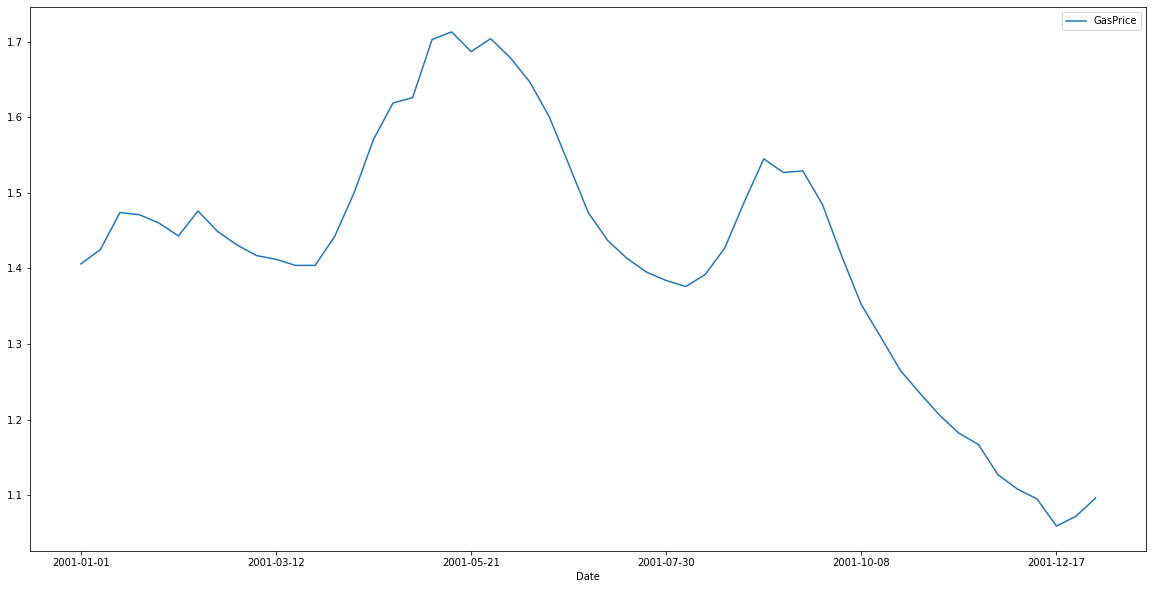

In [11]:
# Draw the line graph to see the trends 
first_data_df.plot.line(figsize=(20, 10))

In [12]:
# Average gas price in 2001 
first_data_df['GasPrice'].mean()

1.4200566037735851

In [13]:
# Gas price in September, 2001 
event_data = first_data.loc[first_data['Month'] ==9]
event_data.head()

,Date,GasPrice,Year,Month,Day,YearMonth
87,2001-09-03,1.545,2001,9,3,2001-09
88,2001-09-10,1.527,2001,9,10,2001-09
89,2001-09-17,1.529,2001,9,17,2001-09
90,2001-09-24,1.485,2001,9,24,2001-09


Once we click the year, we see the trend like this above and create tooltip at the peak and show a relevant event.

In [14]:
disasters = pd.read_csv("Resource/US Disaster List.csv")

disasters_df = disasters[["declaration_date", "incident_type"]]

disasters_df[["Date", "Time"]] = disasters_df["declaration_date"].str.split("T", expand=True)
disasters_df[["Year","Month", "Day"]] = disasters_df["Date"].str.split("-", expand=True)
cleaned_disasters_df = disasters_df.drop(columns = "Time")
cleaned_disasters_df

c:\users\jinhan(walt) zhao\.conda\envs\pythondata\lib\site-packages\pandas\core\frame.py:3069: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self[k1] = value[k2]


,declaration_date,incident_type,Date,Year,Month,Day
0,1953-05-02T00:00:00Z,Tornado,1953-05-02,1953,05,02
1,1953-05-15T00:00:00Z,Tornado,1953-05-15,1953,05,15
2,1953-05-29T00:00:00Z,Flood,1953-05-29,1953,05,29
3,1953-06-02T00:00:00Z,Tornado,1953-06-02,1953,06,02
4,1953-06-06T00:00:00Z,Flood,1953-06-06,1953,06,06
...,...,...,...,...,...,...
61907,2021-04-08T08:08:00Z,Severe Storm(s),2021-04-08,2021,04,08
61908,2021-04-08T08:08:00Z,Severe Storm(s),2021-04-08,2021,04,08
61909,2021-04-08T08:08:00Z,Severe Storm(s),2021-04-08,2021,04,08
61910,2021-04-08T20:52:00Z,Fire,2021-04-08,2021,04,08


In [15]:
cleaned_disasters_df["Year"] = cleaned_disasters_df["Year"].astype(int)
cleaned_disasters_df.dtypes

declaration_date    object
incident_type       object
Date                object
Year                 int32
Month               object
Day                 object
dtype: object

In [16]:
filtered_disasters_df = cleaned_disasters_df.loc[cleaned_disasters_df['Year'] >= 2000]
filtered_disasters_df

,declaration_date,incident_type,Date,Year,Month,Day
19683,2000-01-03T18:30:00Z,Fire,2000-01-03,2000,01,03
19684,2000-01-04T19:10:00Z,Fire,2000-01-04,2000,01,04
19685,2000-01-05T18:35:00Z,Fire,2000-01-05,2000,01,05
19686,2000-01-10T13:00:00Z,Tornado,2000-01-10,2000,01,10
19687,2000-01-10T13:00:00Z,Tornado,2000-01-10,2000,01,10
...,...,...,...,...,...,...
61907,2021-04-08T08:08:00Z,Severe Storm(s),2021-04-08,2021,04,08
61908,2021-04-08T08:08:00Z,Severe Storm(s),2021-04-08,2021,04,08
61909,2021-04-08T08:08:00Z,Severe Storm(s),2021-04-08,2021,04,08
61910,2021-04-08T20:52:00Z,Fire,2021-04-08,2021,04,08


In [17]:
merged_df = filtered_disasters_df.merge(renamed_df, on="Date", how="inner")
merged_df

,declaration_date,incident_type,Date,Year_x,Month_x,Day_x,GasPrice,Year_y,Month_y,Day_y,YearMonth
0,2000-01-03T18:30:00Z,Fire,2000-01-03,2000,01,03,1.272,2000,1,3,2000-01
1,2000-01-10T13:00:00Z,Tornado,2000-01-10,2000,01,10,1.264,2000,1,10,2000-01
2,2000-01-10T13:00:00Z,Tornado,2000-01-10,2000,01,10,1.264,2000,1,10,2000-01
3,2000-01-10T13:00:00Z,Tornado,2000-01-10,2000,01,10,1.264,2000,1,10,2000-01
4,2000-01-10T13:00:00Z,Tornado,2000-01-10,2000,01,10,1.264,2000,1,10,2000-01
...,...,...,...,...,...,...,...,...,...,...,...
5008,2020-12-21T12:45:00Z,Severe Ice Storm,2020-12-21,2020,12,21,2.224,2020,12,21,2020-12
5009,2020-12-21T12:45:00Z,Severe Ice Storm,2020-12-21,2020,12,21,2.224,2020,12,21,2020-12
5010,2020-12-21T17:45:00Z,Severe Ice Storm,2020-12-21,2020,12,21,2.224,2020,12,21,2020-12
5011,2021-01-11T18:05:00Z,Other,2021-01-11,2021,01,11,2.317,2021,1,11,2021-01


In [49]:
disaster_df = merged_df[["Date", "incident_type", "GasPrice"]]
disaster_df.columns = ["Date", "IncidentType", "GasPrice"]
disaster_df = disaster_df.drop_duplicates(subset="Date")
disaster_df

,Date,IncidentType,GasPrice
0,2000-01-03,Fire,1.272
1,2000-01-10,Tornado,1.264
12,2000-01-31,Severe Storm(s),1.316
83,2000-02-28,Severe Storm(s),1.421
234,2000-03-20,Fire,1.529
...,...,...,...
4976,2020-09-28,Fire,2.169
4977,2020-10-26,Fire,2.143
4981,2020-12-21,Severe Ice Storm,2.224
5011,2021-01-11,Other,2.317


In [51]:
disaster_df.to_json("Output/Disaster_Gas.json", orient="records")